# MLBA homework5

### Some utilities

In [3]:
using Dates
using MarketData
using VMLS
using Plots
using LinearAlgebra
using CSV; using DataFrames;
import Random
using Statistics

function penalty_method(f, Df, g, Dg, x1, lambda1; kmax = 100,
    feas_tol = 1e-4, oc_tol = 1e-4)
    x = x1
    mu = 1.0
    feas_res = [norm(g(x))]
    oc_res = [norm(2*Df(x)'*f(x) + 2*mu*Dg(x)'*g(x))]
    lm_iters = zeros(Int64,0,1);
    for k=1:kmax
        F(x) = [f(x); sqrt(mu)*g(x)]
        DF(x) = [Df(x); sqrt(mu)*Dg(x)]
        x, hist = levenberg_marquardt(F,DF,x,lambda1,tol=oc_tol)
        feas_res = [feas_res; norm(g(x))]
        oc_res = [oc_res; hist["residuals"][end]]
        lm_iters = [lm_iters; length(hist["residuals"])]
        if norm(g(x)) < feas_tol
            break
        end
        mu = 2*mu
    end
    return x, Dict([ ("lm_iterations", lm_iters), ("feas_res", feas_res), ("oc_res", oc_res) ])
end


penalty_method (generic function with 1 method)

### Question_1

1. 由於我的系統有問題，故請助教協助下載data，十分感謝。同時附上爬資料的程式碼。

2. Daily_return這個function的輸出是每只股票的預期報酬。

3. 期望報酬是每個資產的平均日收入 x 總日數，expected vcov則是日所得的vcov x 總日數

In [4]:
# start = DateTime(2015, 12, 31)
# AAPL = yahoo(:AAPL, YahooOpt(period1 = start))
# TSLA = yahoo(:TSLA, YahooOpt(period1 = start))
# AMZN = yahoo(:AMZN, YahooOpt(period1 = start))
# TSM = yahoo(:TSM, YahooOpt(period1 = start))
# INTC = yahoo(:INTC, YahooOpt(period1 = start))
# AMD = yahoo(:AMD, YahooOpt(period1 = start))
# NVDA = yahoo(:NVDA, YahooOpt(period1 = start))
# GOOGL = yahoo(:GOOGL, YahooOpt(period1 = start))
# NFLX = yahoo(:NFLX, YahooOpt(period1 = start))
# FB = yahoo(:Fb, YahooOpt(period1 = start))
stock = DataFrame(CSV.File("data/stock_data.csv"))
function Daily_return(given_stock)
    output = []
    for i in 1: (length(given_stock)-1)
        push!(output, (given_stock[i+1]-given_stock[i])/given_stock[i])
    end
return output
end

for j in 2: size(stock)[2]
    stock[:,j] = vcat([1], Daily_return(stock[:,j]))
end
delete!(stock, 1)


,Date,AAPL,TSLA,AMZN,TSM,INTC,AMD
,String15,Float64,Float64,Float64,Float64,Float64,Float64
1,2016/1/4,0.000854988,-0.0691638,-0.0575538,-0.029011,-0.0133527,-0.0348432
2,2016/1/5,-0.0250593,8.95663e-5,-0.00502365,-0.00633766,-0.00470727,-0.00722022
3,2016/1/6,-0.0195697,-0.0196483,-0.00179863,-0.0277905,-0.0221697,-0.0872727
4,2016/1/7,-0.0422046,-0.0154766,-0.039058,-0.0112465,-0.0374849,-0.0916335
5,2016/1/8,0.00528776,-0.0215627,-0.00146398,-0.0137441,-0.0103643,-0.0614035
6,2016/1/11,0.0161922,-0.0149289,0.0176098,0.00576651,0.0174548,0.0934579
7,2016/1/12,0.0145133,0.0101996,0.000242861,-0.0086001,0.0193387,0.0213675
8,2016/1/13,-0.0257103,-0.0460065,-0.0583923,-0.013012,-0.0235618,-0.0585774
9,2016/1/14,0.0218708,0.0293046,0.0192331,0.0654297,0.0260107,-0.0177778


In [5]:
function Stock_info(SS, t)
    Stock = DataFrame(Date = String[], AAPL = Float64[], TSLA = Float64[], AMZN = Float64[], TSM = Float64[], INTC = Float64[],AMD = Float64[], NVDA = Float64[], GOOGL = Float64[], NFLX = Float64[], FB = Float64[])
    for i in 1:size(SS)[1]
        if parse(Float64, SubString(SS[i,"Date"], 1, 4)) >= t
            push!(Stock, SS[i, :])
        end
    end
    u = []
    for j in 2:size(Stock)[2]
        current_asset = Stock[:,j]
        push!(u, round(avg(current_asset)*size(Stock)[1], digits=4))
    end
    vcov = cov(Matrix(Stock[:, 2:11]))*size(Stock)[1]
    return u, round.(vcov, digits = 4)
end
println("The expected returns for 2016~2020 are: ", Stock_info(stock, 2016)[1], "\n")
println("The expected returns for 2018~2020 are: ", Stock_info(stock, 2018)[1], "\n")
println("The  return covariance matrix in 2016~2020 is: ", Stock_info(stock, 2016)[2], "\n")
println("The  return covariance matrix in 2018~2020 is: ", Stock_info(stock, 2018)[2], "\n")

The expected returns for 2016~2020 are: Any[1.8545, 3.5087, 1.8124, 1.7819, 0.6255, 4.4975, 3.3318, 0.9768, 1.9339, 1.2279]

The expected returns for 2018~2020 are: Any[1.3367, 3.1105, 1.1988, 1.1835, 0.2924, 2.7213, 1.3766, 0.6418, 1.2791, 0.6517]

The  return covariance matrix in 2016~2020 is: [0.4553 0.3358 0.2727 0.2548 0.2827 0.3909 0.4003 0.2603 0.2785 0.2887; 0.3358 1.6719 0.323 0.2921 0.3026 0.5389 0.5081 0.2776 0.3944 0.3097; 0.2727 0.323 0.4623 0.2061 0.2298 0.3759 0.3731 0.2659 0.3585 0.3122; 0.2548 0.2921 0.2061 0.4306 0.2522 0.3897 0.3862 0.2103 0.2232 0.2048; 0.2827 0.3026 0.2298 0.2522 0.5525 0.3586 0.4219 0.2473 0.2675 0.2471; 0.3909 0.5389 0.3759 0.3897 0.3586 2.1192 0.8218 0.2912 0.4447 0.3277; 0.4003 0.5081 0.3731 0.3862 0.4219 0.8218 1.1266 0.3505 0.4191 0.3821; 0.2603 0.2776 0.2659 0.2103 0.2473 0.2912 0.3505 0.3468 0.2728 0.3008; 0.2785 0.3944 0.3585 0.2232 0.2675 0.4447 0.4191 0.2728 0.8224 0.3123; 0.2887 0.3097 0.3122 0.2048 0.2471 0.3277 0.3821 0.3008 0.3123 0.

第二小題的意思是，要用過去等長度的資料預測未來的最佳化資產配置情況；且期間越長，預期報酬就越高。

題目要最小化的條件式，等價於 最小化(R-rho)^2 , 所以這邊可以使用”port_opt“這個方程式。

要注意的是，40個月的100k，要按照w的資產配置比例去扣掉88,888元；這邊程式跑error，故用文字敘述。

In [6]:
cum_value(r) = 10000 * cumprod(1 .+ r)
mu = 0.10/size(stock)[1]; sigma = 0.05/sqrt(size(stock)[1]);
T = size(stock)[1];  # One year's worth of trading days
r = mu .+ sigma*randn(T);
v = cum_value(r);

In [9]:


function port_opt(R,rho)
    T, n = size(R)
    mu = sum(R, dims=1)'/T
    KKT = [ 2*R'*R ones(n) mu; ones(n)' 0 0; mu' 0 0]
    wz1z2 = KKT \ [2*rho*T*mu; 1; rho]
    w = wz1z2[1:n]
    return w
end;
R, Rtest = portfolio_data();
T, n = size(R)
rho = 0.10/size(stock)[1];  # Ask for 10% annual return
w = port_opt(R,rho)
r = R*w;  # Portfolio return time series
pf_return = size(stock)[1]*avg(r)
pf_risk = sqrt(size(stock)[1])*stdev(r)
w

20-element Vector{Float64}:
  0.004261721801780633
 -0.008530801470620679
 -0.0008796127401464329
  0.00443792765340705
  0.012029977405154655
 -0.014797858875015384
  0.0024919407095527184
  0.0026993659020597754
  0.0019356261505706063
 -0.012609162162487834
  0.008115945170501368
 -0.010415918738274514
 -0.00496827830047747
  0.018176118062829448
  0.009346634266607971
  0.009667301745638983
  0.0040398805321982464
 -0.0005486676345731286
  0.004869917921276636
  0.9706779426000172

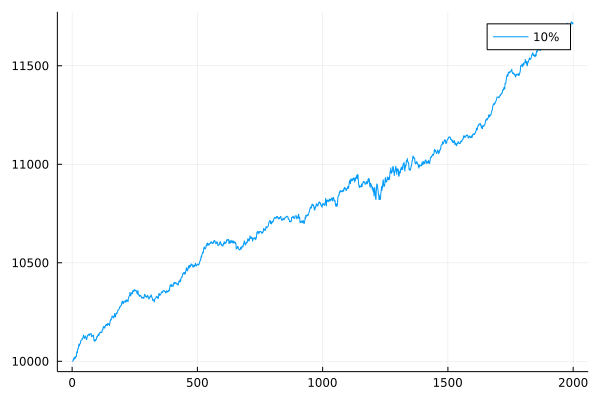

In [8]:
plot(1:T, cum_value(r), label= "10%")

### Question_2



這邊要minimize的式子應是一個32-vector：前16個vector是datapoint和X座標在2維平面的距離，後面16個entries則是datapoint和Y座標在2維平面的距離。

In [10]:
orbit = DataFrame(CSV.File("data/orbit.csv"))
Random.seed!(19991213)
f(theta) = [theta[1] .+ theta[3]*cos.(theta[5] .+ xd) .+ theta[4]*cos.(theta[5] .- xd),
            theta[2] .+ theta[3]*sin.(theta[5] .+ xd) .+ theta[4]*sin.(theta[5] .- xd)]
Df(theta) = 

,Asteroid Name,X,Y,Mass
,String7,Float64,Float64,Float64
1,M1001,1.59,0.27,0.73
2,M1002,2.74,1.14,0.98
3,M1003,0.61,0.02,0.88
4,M1004,-0.29,0.98,1.78
5,M1005,0.14,1.39,2.31
6,M1006,0.44,0.05,0.16
7,M1007,-0.03,0.03,0.07
8,M1008,2.55,1.63,0.25
9,M1009,0.76,1.49,0.34


### Question_3

這邊有檢查過微分式正確，助教office hour表示圖怪怪的，不該只有3個點。後來自己也沒找到問題在哪裏QQ

In [50]:
f(x) = [ x[1]^2 + 0.5*(x[2]^2) + x[3]^2 - 3];
Df(x) = [ 2*x[1] x[2] 2*x[3] ]; #3*1
g(x) = [ 0.75*x[1]^2+2.5*x[2]^2+x[3]^2+2*x[1]*x[3]-x[1]-x[2]-x[3]-1];
Dg(x) = [ 1.5*x[1]+2*x[3]-1 5*x[2]-1 2*x[3]+2*x[1]-1 ]; # 1*3
x, hist = penalty_method(f, Df, g, Dg, [1.1, 2.1, 3.1], 1.0);
x


3-element Vector{Float64}:
 -0.15632814233292577
  0.550560718455712
  1.6804763987803217

In [51]:
x, z, hist = aug_lag_method(f, Df, g, Dg, [1.1, 2.1, 3.1], 1.0);
println(x)
println(z)

[-0.15632814233292577, 0.550560718455712, 1.6804763987803217]
[4.14494677425381e-6]


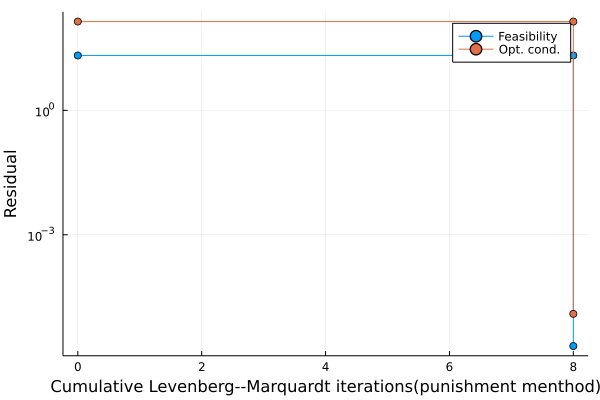

In [47]:
cum_lm_iters = cumsum(hist["lm_iterations"], dims=1);
itr = vcat([0], [[i; i] for i in cum_lm_iters]...)
feas_res = vcat([[r;r] for r in hist["feas_res"][1:end-1]]...,hist["feas_res"][end]);
oc_res = vcat([[r;r] for r in hist["oc_res"][1:end-1]]...,hist["oc_res"][end]);
plot(itr, feas_res, shape=:circle, label = "Feasibility")
plot!(itr, oc_res, shape=:circle, label = "Opt. cond.")
plot!(yscale = :log10,xlabel = "Cumulative Levenberg--Marquardt iterations(punishment menthod)",ylabel = "Residual")


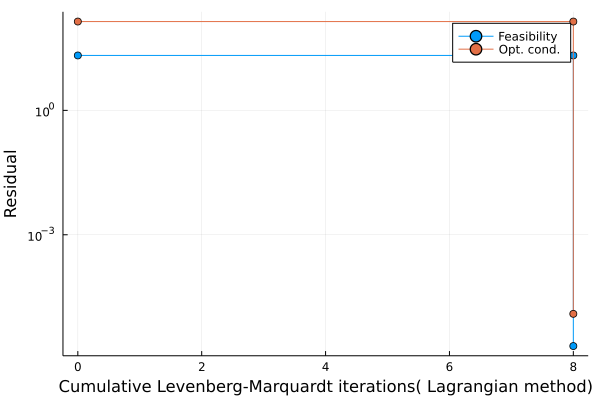

In [49]:

cum_lm_iters = cumsum(hist["lm_iterations"],dims=1);
itr = vcat([0], [[i; i] for i in cum_lm_iters]...)
feas_res = vcat([[r;r] for r in hist["feas_res"][1:end-1]]...,hist["feas_res"][end]);
oc_res = vcat([[r;r] for r in hist["oc_res"][1:end-1]]...,hist["oc_res"][end]);
plot(itr, feas_res, shape=:circle, label = "Feasibility")
plot!(itr, oc_res, shape=:circle, label = "Opt. cond.")
plot!(yscale = :log10,xlabel = "Cumulative Levenberg-Marquardt iterations( Lagrangian method)",ylabel = "Residual")

### Quention_4

這邊LM input的f應有200+13維，後面13維是delta的norm。

有嘗試對這13個參數做微分，結果跑error，故貼上程式碼參考。

In [91]:
neural = DataFrame(CSV.File("data/neural_data.csv"))
function sigmoid(z::Array)
    return 1.0 ./ (1.0 .+ exp.(-z))
end
x1 = neural[:,1]
x2 = neural[:,2]
Y = neural[:,3]
f(theta) = [theta[1]*sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4]) + theta[5]*sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8]) + theta[9]*sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12]) .+ theta[13] - Y;
            theta[1] + theta[2] + theta[3] + theta[4] + theta[5] + theta[6] +theta[7] + theta[8] + theta[9] +theta[10] + theta[11] + theta[12] + theta[13]]
Df(theta) = hcat(
    sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4]), 
    theta[1]*x1.*sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4]).*(1 .- sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4])),
    theta[1]*x2.*sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4]).*(1 .- sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4])),
    theta[1].*sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4]).*(1 .- sigmoid(theta[2]*x1 .+ theta[3]*x2 .+ theta[4])),
    sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8]),
    theta[5]*x1.*sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8]).*(1 .- sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8])),
    theta[5]*x2.*sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8]).*(1 .- sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8])),
    theta[5].*sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8]).*(1 .- sigmoid(theta[6]*x1 .+ theta[7]*x2 .+ theta[8])),
    sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12]),
    theta[9]*x1.*sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12]).*(1 .- sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12])),
    theta[9]*x2.*sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12]).*(1 .- sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12])),
    theta[9].*sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12]).*(1 .- sigmoid(theta[10]*x1 .+ theta[11]*x2 .+ theta[12])),
    1
    )
    
f(rand(13))

LoadError: ArgumentError: number of columns of each array must match (got (1, 3))

## 結語
這學期辛苦助教了！

（這份作業上下花了30個小時，很抱歉很多題目都寫不好。）

In [3]:
A = [7 -4 -3;
    -4 8 0;
    -3 0 3]
X = hcat(ones(6), [0,1,2, 0, 1, 2]) # , [0,1,2, 0, 1, 2]
y = [1,0,2,1,3,5]

inv(X'*X)*X'*y

2-element Vector{Float64}:
 0.75
 1.25